In [6]:
import torch as t
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
import numpy as np
show = ToPILImage()

# 定义对数据的预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  #归一化
])

# 训练集
trainset = tv.datasets.CIFAR10(
    root='f://cifar10/', train=True, download=True, transform=transform)

trainloader = t.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True, num_workers=4)

# 测试集
testset = tv.datasets.CIFAR10(
    'f://cifar10/', train=False, download=True, transform=transform)

testloader = t.utils.data.DataLoader(
    testset, batch_size=4, shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
           'ship', 'truck')

data, label = trainset[100]

Files already downloaded and verified
Files already downloaded and verified


ship


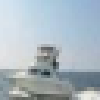

In [7]:
print(classes[label])
show((data + 1) / 2).resize((100, 100))

          truck             cat            deer             car


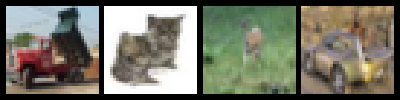

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(' '.join(['%15s'%classes[i] for i in labels]))
show(tv.utils.make_grid((images + 1) / 2)).resize((400, 100))

In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    


In [11]:
net = Net()
print(net)

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [12]:
from torch import optim
from torch.autograd import Variable
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d %d] loss: %.3f' \
                     %(epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1 2000] loss: 1.207
[1 4000] loss: 1.181
[1 6000] loss: 1.188
[1 8000] loss: 1.182
[1 10000] loss: 1.168
[1 12000] loss: 1.167
[2 2000] loss: 1.086
[2 4000] loss: 1.112
[2 6000] loss: 1.100
